# Load Packages

In [5]:
import sklearn.datasets
import sklearn.linear_model
import sklearn.tree
import sklearn.ensemble
import sklearn.model_selection
import sklearn.metrics
import numpy as np

import matplotlib.pyplot as plt 
%matplotlib inline

# Load Additional Packages (if you want to use other modules in Scikit Learn)

In [6]:
# Load additional scikit learn packages! if you need
from sklearn import preprocessing

# Load Data Points (Do not modify the following block)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

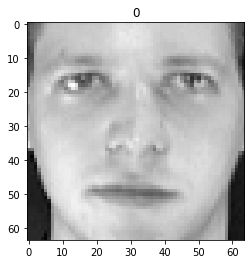

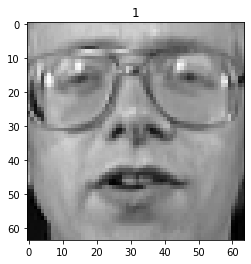

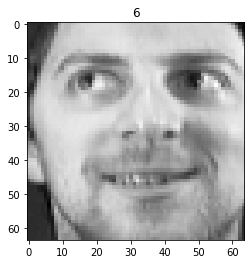

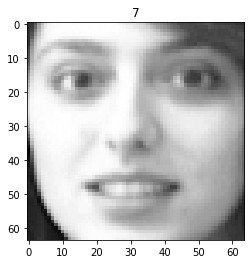

In [7]:
olivetti_faces = sklearn.datasets.fetch_olivetti_faces(random_state=0,)
print(olivetti_faces['DESCR'])

example_indices = [0, 10, 62, 70]
for idx in example_indices:
    plt.title(olivetti_faces['target'][idx])
    plt.imshow(olivetti_faces['images'][idx])
    plt.gray()
    plt.show()
    
X = olivetti_faces['data']
y = olivetti_faces['target']
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

# Classification with Scikit Learn Library (Programming Assignment)
### Variable Explanation (Do not change variable names)
- 'olivetti_faces' is a variable containing a set of face images
- 'X_train' is feature vectors of training dataset
- 'y_train' is target labels of training dataset
- 'X_test' is feature vectors of test dataset
- 'y_test' is target labels of test dataset
- 'y_pred' was initialized as zero vectors and fill 'y_pred' with predicted labels

### Find the best model and hyperparameter for face recognition

In [8]:
#TODO
#1. Create a classification object in scikit learn package (such as perceptron, logistic regression, or other classification algorithms)
#2. Fit the object to training dataset
#3. Predict the label of test data point (X_test)
# - Do not change the variable name "y_pred"


scaler = preprocessing.StandardScaler().fit(X)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)

log_reg=sklearn.linear_model.LogisticRegression(random_state=0, max_iter=200, C=44.8455, tol=0.000180)
log_reg.fit(X_train, y_train)

y_pred = np.zeros_like(y_test)
y_pred=log_reg.predict(X_test)

### Print accuracy (do not modify the following block)

In [9]:
print('Accuracy: %.2f' % sklearn.metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.98


In [ ]:
#Not used


In [11]:
#Perceptron

tol=np.linspace(0, 0.4, 10, endpoint=True)[1:]

for i in tol:
    ppn2=sklearn.linear_model.Perceptron(penalty='elasticnet', random_state=0, tol=i,  l1_ratio=0.266)
    ppn2.fit(X_train, y_train)
    y_pred2 = np.zeros_like(y_test)
    y_pred2 = ppn2.predict(X_test)
    curr_acc=sklearn.metrics.accuracy_score(y_test, y_pred2)
    print('when tol=%f, Accuracy: %f' %(i, curr_acc))
        

when tol=0.044444, Accuracy: 0.808333
when tol=0.088889, Accuracy: 0.808333
when tol=0.133333, Accuracy: 0.808333
when tol=0.177778, Accuracy: 0.808333
when tol=0.222222, Accuracy: 0.808333
when tol=0.266667, Accuracy: 0.808333
when tol=0.311111, Accuracy: 0.808333
when tol=0.355556, Accuracy: 0.808333
when tol=0.400000, Accuracy: 0.808333


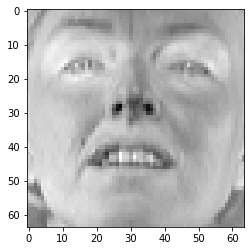

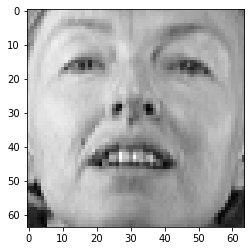

In [8]:
#Logistic Regression with scaled data

scaler2 = preprocessing.StandardScaler().fit(X)
train_scaled2 = scaler.transform(X_train)
test_scaled2=scaler.transform(X_test)

samples=[25]
for sam in samples:
    plt.imshow(test_scaled2[sam].reshape(64,64))
    plt.gray()
    plt.show()
    plt.imshow(X_test[sam].reshape(64,64))
    plt.gray()
    plt.show()

In [9]:
tol=np.linspace(0.000180, 0.000200, 1, endpoint=True)[:]
c=np.linspace(44.8455, 44.85, 1, endpoint=True)[:]

for i in c:
    for j in tol:
        log_reg2=sklearn.linear_model.LogisticRegression(random_state=0, max_iter=200, C=i, tol=j)
        log_reg2.fit(train_scaled2, y_train)
        y_pred_log = np.zeros_like(y_test)
        y_pred_log=log_reg2.predict(test_scaled2)
        print('tol=%f c=%f Accuracy: %f' % (j, i,sklearn.metrics.accuracy_score(y_test, y_pred_log)))

tol=0.000180 c=44.845500 Accuracy: 0.983333


In [564]:
for i in range(120):
    num=i
    if y_test[num]!=y_pred_log[num]:
        print("--", i, "--")
        print(y_test[num])
        print(y_pred_log[num])

-- 26 --
7
2
-- 47 --
25
2


In [600]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(random_state=0, n_estimators=50, max_features='log2')
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print("%f"%sklearn.metrics.accuracy_score(y_test, pred))

0.841667


In [42]:
from sklearn.svm import SVC
 
svm_model = SVC(random_state=None, C=100, tol=0.0001)
 
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print('Accuracy: %.2f' % sklearn.metrics.accuracy_score(y_test, svm_pred))

Accuracy: 0.93
